## random forest
集成学习：考虑多个评估器的建模结果，汇总之后得到一个综合的结果，以此来获取比单个模型更好的回归或分类表表现。

多个模型集成为的模型称为集成评估器ensemble estimator. 组成集成评估器的单个模型叫做基评估器base estimator.

通常有三类集成算法： Bagging装袋法，boosting提升法，stacking.

bagging核心思想：平行。最终通过平均值/少数服从多数多数的结果。 代表随机森林

boosting核心思想：GBT adaboost

In [2]:
# sklearn.ensemble
# random forest的base estimator就是决策树（缺点：容易过拟合；两个问题：选哪个特征剪枝，何时停止生长）
# 所以参数与决策树相似，但有独有的随机森林的参数
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# rfc = RandomForestClassifier()
# rfc = rfc.fit(Xtrain, Ytrain)
# score = rfc.score(Xtest, Ytest)

In [ ]:
# n_estimators
# - base estimator的数目
# - 对模型的acc影响时单调的，越大效果越好。但到达一定程度，acc不再上升；且数目越多，模型越难调


In [3]:
# 导入数据
wine = load_wine()

wine.data.shape

(178, 13)

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size = 0.3)

In [32]:
clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0, oob_score = True)

clf = clf.fit(Xtrain, Ytrain)
rfc = rfc.fit(Xtrain, Ytrain)

score_c = clf.score(Xtest, Ytest)
score_r = rfc.score(Xtest, Ytest)

rfc.oob_score_

/home/esterl/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/esterl/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/esterl/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9354838709677419

In [12]:
print("single Tree:{}".format(score_c)
     ,"Random_Forest:{}".format(score_r))

single Tree:0.9629629629629629 Random_Forest:0.9814814814814815


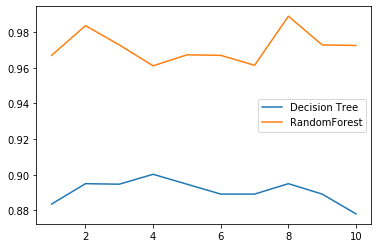

In [18]:
# 比较决策树于随机森林
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
clf_s = []
rfc_s = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    clf = DecisionTreeClassifier()
    clf_s1 = cross_val_score(clf, wine.data, wine.target, cv = 10).mean()
    rfc_s1 = cross_val_score(rfc, wine.data, wine.target, cv =10).mean()
    clf_s.append(clf_s1)
    rfc_s.append(rfc_s1)
    

figure = plt.figure()
plt.plot(range(1,11), clf_s, label = 'Decision Tree')
plt.plot(range(1,11), rfc_s, label = 'RandomForest')
plt.legend()
plt.show()

rfc

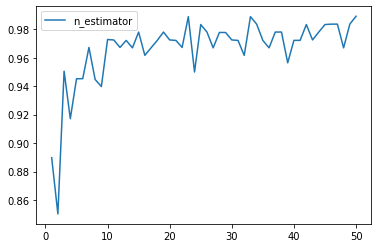

In [26]:
# 重要参数
# n_estimator, random_state, boostrap, oob_score(是否采用包外数据，对应于属性oob_score_)
# n_estimator的学习曲线
superpa = []
for i in range(50):
    rfc = RandomForestClassifier(n_estimators = i+1, n_jobs=-1)
    rfc_score = cross_val_score(rfc, wine.data, wine.target, cv = 10).mean()
    superpa.append(rfc_score)
    
figure = plt.figure()
plt.plot(range(1,51), superpa, label = 'n_estimator')
plt.legend()
plt.show()


In [ ]:
# 常用属性与接口
# ,estimators,.obb_score_
# fit,score,apply, predict  predic_proba(	Predict class probabilities for X.)

In [ ]:
# bagging 是基于自助采样法。约有63.2%会出现在初始采样集中
# 包外36.8%的样本可用作验证集对样本进行包外估计
# -其余用途：当base estimator 为决策树时辅助剪枝；为神经网络时辅助early stop
# 从bias-variance角度主要关注方差的降低，因此其在易受样本扰动的学习器如不剪枝的决策树和神经网络上效用更明显
# oob_score为True时，袋外数据 可以用作验证集，即随机森林可以不需要划分训练集和验证集

why 

In [1]:
import numpy as np
from scipy.special import comb # 求组合

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [17]:
# 随机森林中的重要属性：estimators_，查看每个基评估器的情况


rfc = RandomForestClassifier(n_estimators = 25, oob_score = True)
rfc = rfc.fit(wine.data,wine.target)

rfc.estimators_[0].random_state
# for i in range(len(rfc.estimators_)):
#     print(rfc.estimators_[i].random_state)
    
    
rfc.oob_score_

/home/esterl/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/esterl/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.9438202247191011

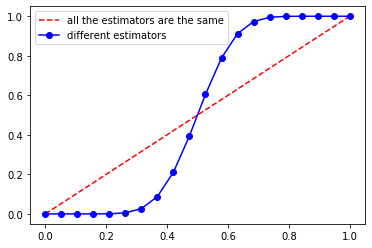

In [26]:
# bagging的另一个必要条件：base estimator的误差率<0.5
# base estimator相互独立
import matplotlib.pyplot as plt
x = np.linspace(0,1,20)
y = []
for e in x:
    E = np.array([comb(25,j)*(e**j)*((1-e)**(25-j)) for j in range(13,26)]).sum()
    y.append(E)
    
plt.figure(1)
plt.plot(x,x,'r--', label = 'all the estimators are the same')
plt.plot(x,y,'bo-', label = 'different estimators')
plt.legend()
plt.show()
